# Stirling Engine Experiment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
def maxfinder(x_array, y_array, x_ranges):
    maxx, maxy = [], []
    for i in range(len(x_ranges)-1):
        arr = np.where((x_array >= x_ranges[i]) & (x_array <= x_ranges[i+1]))[0]
        xi, yi = x_array[arr[0]:arr[-1]], y_array[arr[0]:arr[-1]]
        for i in range(len(yi)):
            if yi[i] == yi.max():
                maxs = [xi[i], yi[i]]
        maxx.append(maxs[0])
        maxy.append(maxs[1])
    return np.array(maxx), np.array(maxy)

def minfinder(x_array, y_array, x_ranges):
    minx, miny = [], []
    for i in range(len(x_ranges)-1):
        arr = np.where((x_array >= x_ranges[i]) & (x_array <= x_ranges[i+1]))[0]
        xi, yi = x_array[arr[0]:arr[-1]], y_array[arr[0]:arr[-1]]
        for i in range(len(yi)):
            if yi[i] == yi.min():
                mins = [xi[i], yi[i]]
        minx.append(mins[0])
        miny.append(mins[1])
    return np.array(minx), np.array(miny)

In [3]:
def linfit(x, m, c):
    return m*x + c

## Pressure Calibration

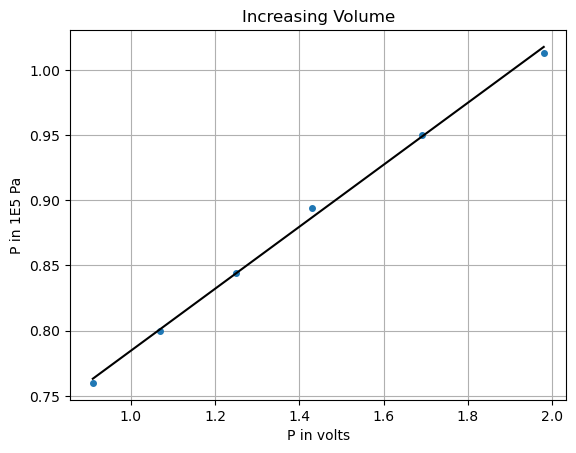

Slope = 0.2378076602247032, Intercept = 0.5467541489169329.


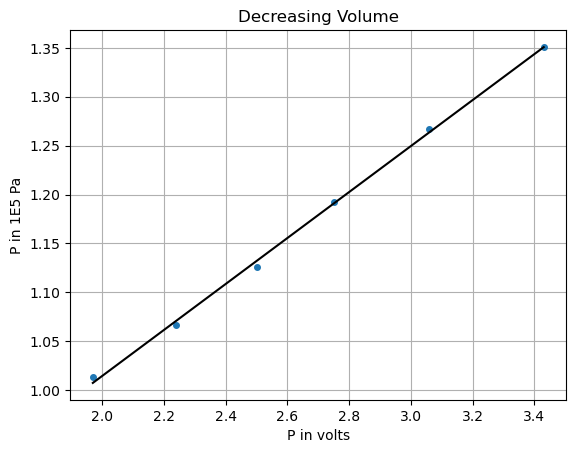

Slope = 0.23531190633433807, Intercept = 0.5436764496608893.


In [4]:
df1 = pd.read_excel("P_cal2.xlsx", sheet_name='inc')
V = df1['V in ml'].to_numpy()
pV = df1['P in volts'].to_numpy()
pPa = df1['P in 1E5 Pa'].to_numpy()
popt, pvar = curve_fit(linfit, pV, pPa)
pfit = linfit(pV, *popt)
plt.plot(pV, pPa, 'o', ms=4)
plt.plot(pV, pfit, 'k-')
plt.title('Increasing Volume')
plt.xlabel('P in volts')
plt.ylabel('P in 1E5 Pa')
plt.grid()
plt.savefig('P_cal_inc.png', dpi=150)
plt.show()
m1, c1 = popt[0], popt[1]
print(f'Slope = {m1}, Intercept = {c1}.')

df1 = pd.read_excel("P_cal2.xlsx", sheet_name='dec')
V = df1['V in ml'].to_numpy()
pV = df1['P in volts'].to_numpy()
pPa = df1['P in 1E5 Pa'].to_numpy()
popt, pvar = curve_fit(linfit, pV, pPa)
pfit = linfit(pV, *popt)
plt.plot(pV, pPa, 'o', ms=4)
plt.plot(pV, pfit, 'k')
plt.title('Decreasing Volume')
plt.xlabel('P in volts')
plt.ylabel('P in 1E5 Pa')
plt.grid()
plt.savefig('P_cal_dec.png', dpi=150)
plt.show()
m2, c2 = popt[0], popt[1]
print(f'Slope = {m2}, Intercept = {c2}.')

In [5]:
print(f'Mean slope = {(m1+m2)/2}.')
P_fn = lambda P_in_V: (m1+m2)*P_in_V/2

Mean slope = 0.23655978327952065.


## Load 0

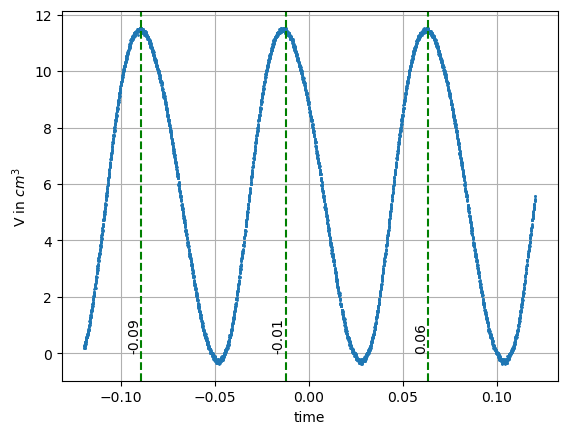

Del_t = 0.23996, T = 0.07624, no. of periods = 3.1474291710388247.


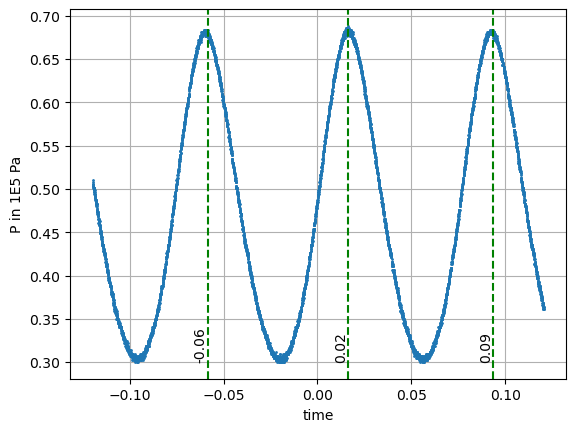

Del_t = 0.23996, T = 0.07594000000000001, no. of periods = 3.159863049776139.


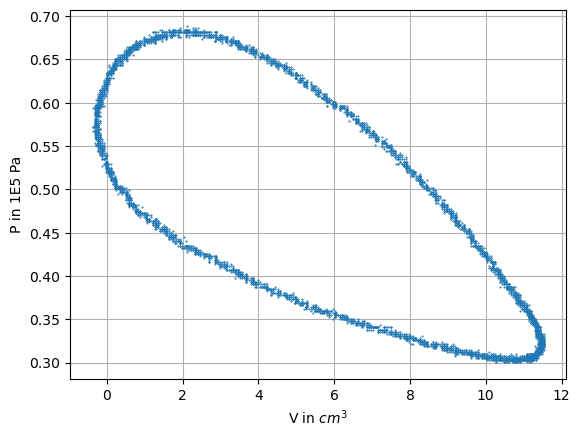

number of loops = 3. Total area = 6.865679948083286. Area of loop = 2.2885599826944287.


In [6]:
dfv = pd.read_csv("rL0C2.csv")
dfp = pd.read_csv("rL0C1.csv")

tV = dfv['[s]'].to_numpy()
Vv = dfv['CH2[V]'].to_numpy()
tP = dfp['[s]'].to_numpy()
Pv = dfp['CH1[V]'].to_numpy()
tV_rng = np.array([-0.119, -0.048, 0.028, 0.103])
tP_rng = np.array([-0.096, -0.021, 0.056, 0.119])

Vc = Vv*2.4
DtV = tV[-1] - tV[0]
maxx, maxy = maxfinder(tV, Vc, tV_rng)
TV = np.mean(np.diff(maxx))
TnV = DtV/TV
plt.plot(tV, Vc, 'o', ms=1)
for i in maxx:
    plt.axvline(i, color='green', linestyle='--')
    plt.text(i, 0, f'{i:.2f}', rotation=90, 
             verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('time')
plt.ylabel('V in $cm^3$')
plt.grid()
plt.savefig('L01.png', dpi=100)
plt.show()
print(f'Del_t = {DtV}, T = {TV}, no. of periods = {TnV}.')

Ppa = P_fn(Pv)
DtP = tP[-1] - tP[0]
maxx, maxy = maxfinder(tP, Ppa, tP_rng)
TP = np.mean(np.diff(maxx))
TnP = DtP/TP
plt.plot(tP, Ppa, 'o', ms=1)
for i in maxx:
    plt.axvline(i, color='green', linestyle='--')
    plt.text(i, Ppa.min(), f'{i:.2f}', rotation=90, 
             verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('time')
plt.ylabel('P in 1E5 Pa')
plt.grid()
plt.savefig('L02.png', dpi=100)
plt.show()
print(f'Del_t = {DtP}, T = {TP}, no. of periods = {TnP}.')

Tn = 3      # INPUT
t_ind = np.where(tV <= tV[0] + Tn*TV)[0]
Vc1, Ppa1 = Vc[t_ind], Ppa[t_ind]
plt.plot(Vc1, Ppa1, '.', ms = 1)
plt.xlabel('V in $cm^3$')
plt.ylabel('P in 1E5 Pa')
plt.grid()
plt.savefig('L0.png', dpi=150)
plt.show()

At = abs(np.trapz(Ppa1, Vc1))
Al = (At)/Tn
print(f'number of loops = {Tn}. Total area = {At}. Area of loop = {Al}.')

## Load 3

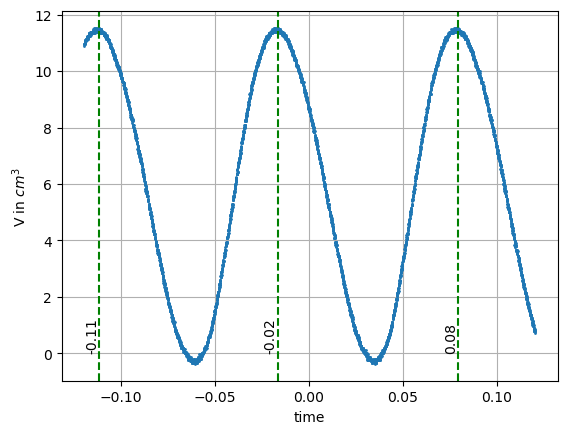

Del_t = 0.23996, T = 0.09544, no. of periods = 2.5142497904442584.


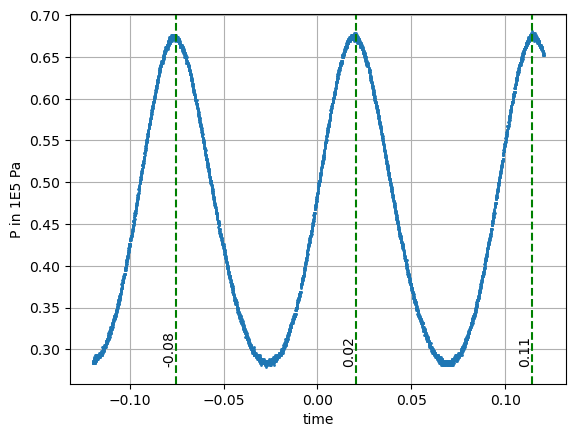

Del_t = 0.23996, T = 0.0948, no. of periods = 2.531223628691983.


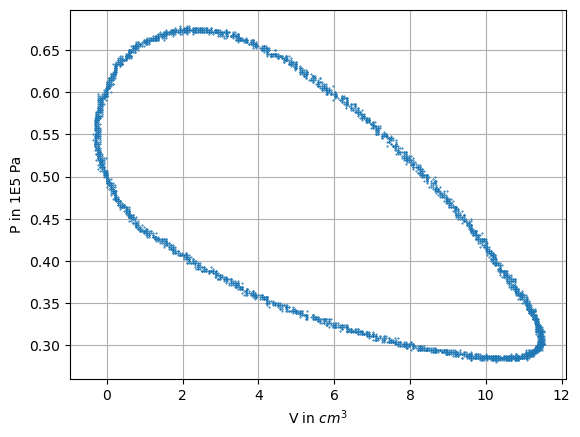

number of loops = 2. Total area = 5.188129304593295. Area of loop = 2.5940646522966473.


In [7]:
dfv = pd.read_csv("rL3C2.csv")
dfp = pd.read_csv("rL3C1.csv")

tV = dfv['[s]'].to_numpy()
Vv = dfv['CH2[V]'].to_numpy()
tP = dfp['[s]'].to_numpy()
Pv = dfp['CH1[V]'].to_numpy()
tV_rng = np.array([-0.12, -0.06, 0.034, 0.119])
tP_rng = np.array([-0.116, -0.027, 0.068, 0.12])

Vc = Vv*2.4
DtV = tV[-1] - tV[0]
maxx, maxy = maxfinder(tV, Vc, tV_rng)
TV = np.mean(np.diff(maxx))
TnV = DtV/TV
plt.plot(tV, Vc, 'o', ms=1)
for i in maxx:
    plt.axvline(i, color='green', linestyle='--')
    plt.text(i, 0, f'{i:.2f}', rotation=90, 
             verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('time')
plt.ylabel('V in $cm^3$')
plt.grid()
plt.savefig('L31.png', dpi=100)
plt.show()
print(f'Del_t = {DtV}, T = {TV}, no. of periods = {TnV}.')

Ppa = P_fn(Pv)
DtP = tP[-1] - tP[0]
maxx, maxy = maxfinder(tP, Ppa, tP_rng)
TP = np.mean(np.diff(maxx))
TnP = DtP/TP
plt.plot(tP, Ppa, 'o', ms=1)
for i in maxx:
    plt.axvline(i, color='green', linestyle='--')
    plt.text(i, Ppa.min(), f'{i:.2f}', rotation=90, 
             verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('time')
plt.ylabel('P in 1E5 Pa')
plt.grid()
plt.savefig('L32.png', dpi=100)
plt.show()
print(f'Del_t = {DtP}, T = {TP}, no. of periods = {TnP}.')

Tn = 2      # INPUT
t_ind = np.where(tV <= tV[0] + Tn*TV)[0]
Vc1, Ppa1 = Vc[t_ind], Ppa[t_ind]
plt.plot(Vc1, Ppa1, '.', ms = 1)
plt.xlabel('V in $cm^3$')
plt.ylabel('P in 1E5 Pa')
plt.grid()
plt.savefig('L3.png', dpi=150)
plt.show()

At = abs(np.trapz(Ppa1, Vc1))
Al = At/Tn
print(f'number of loops = {Tn}. Total area = {At}. Area of loop = {Al}.')

## Load 5

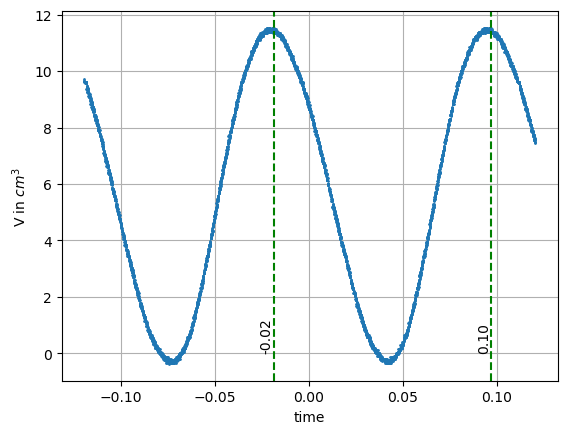

Del_t = 0.23996, T = 0.11588, no. of periods = 2.070762858129099.


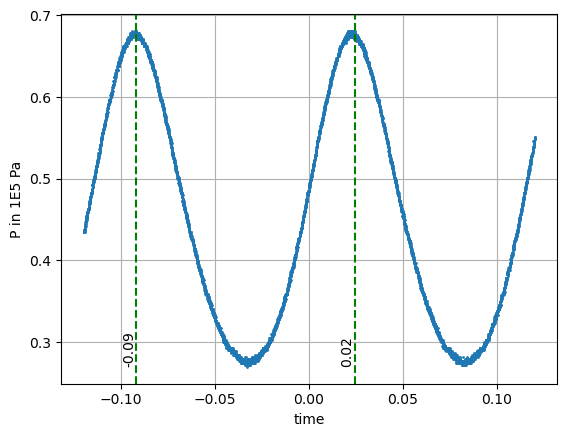

Del_t = 0.23996, T = 0.11632, no. of periods = 2.06292984869326.


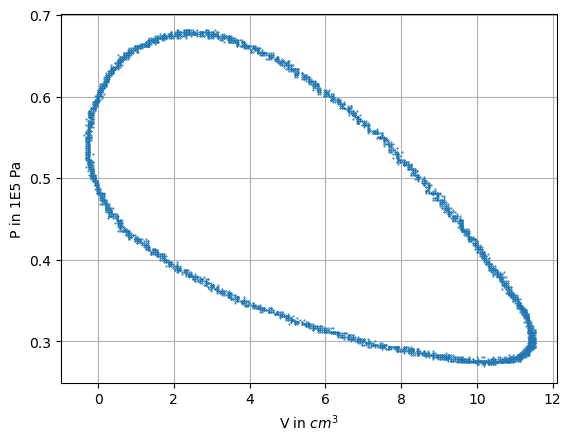

number of loops = 2. Total area = 5.570416869722672. Area of loop = 2.785208434861336.


In [8]:
dfv = pd.read_csv("rL5C2.csv")
dfp = pd.read_csv("rL5C1.csv")

tV = dfv['[s]'].to_numpy()
Vv = dfv['CH2[V]'].to_numpy()
tP = dfp['[s]'].to_numpy()
Pv = dfp['CH1[V]'].to_numpy()
tV_rng = np.array([-0.075, 0.042, 0.119])
tP_rng = np.array([-0.119, -0.033, 0.082])

Vc = Vv*2.4
DtV = tV[-1] - tV[0]
maxx, maxy = maxfinder(tV, Vc, tV_rng)
TV = np.mean(np.diff(maxx))
TnV = DtV/TV
plt.plot(tV, Vc, 'o', ms=1)
for i in maxx:
    plt.axvline(i, color='green', linestyle='--')
    plt.text(i, 0, f'{i:.2f}', rotation=90, 
             verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('time')
plt.ylabel('V in $cm^3$')
plt.grid()
plt.savefig('L51.png', dpi=100)
plt.show()
print(f'Del_t = {DtV}, T = {TV}, no. of periods = {TnV}.')

Ppa = P_fn(Pv)
DtP = tP[-1] - tP[0]
maxx, maxy = maxfinder(tP, Ppa, tP_rng)
TP = np.mean(np.diff(maxx))
TnP = DtP/TP
plt.plot(tP, Ppa, 'o', ms=1)
for i in maxx:
    plt.axvline(i, color='green', linestyle='--')
    plt.text(i, Ppa.min(), f'{i:.2f}', rotation=90, 
             verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('time')
plt.ylabel('P in 1E5 Pa')
plt.grid()
plt.savefig('L52.png', dpi=100)
plt.show()
print(f'Del_t = {DtP}, T = {TP}, no. of periods = {TnP}.')

Tn = 2      # INPUT
t_ind = np.where(tV <= tV[0] + Tn*TV)[0]
Vc1, Ppa1 = Vc[t_ind], Ppa[t_ind]
plt.plot(Vc1, Ppa1, '.', ms = 1)
plt.xlabel('V in $cm^3$')
plt.ylabel('P in 1E5 Pa')
plt.grid()
plt.savefig('L5.png', dpi=150)
plt.show()

At = abs(np.trapz(Ppa1, Vc1))
Al = At/Tn
print(f'number of loops = {Tn}. Total area = {At}. Area of loop = {Al}.')

## Load 7

Here for calculating period, we need to deal with minima instead of maxima.

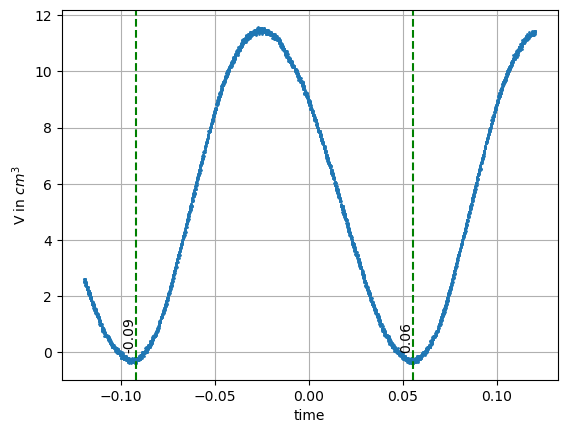

Del_t = 0.23996, T = 0.14768, no. of periods = 1.6248645720476707.


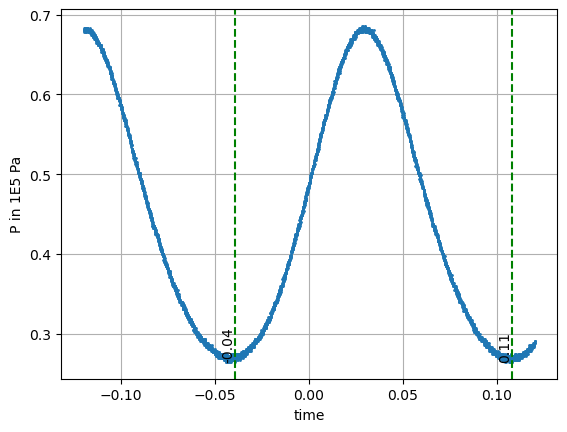

Del_t = 0.23996, T = 0.14748, no. of periods = 1.6270680770273935.


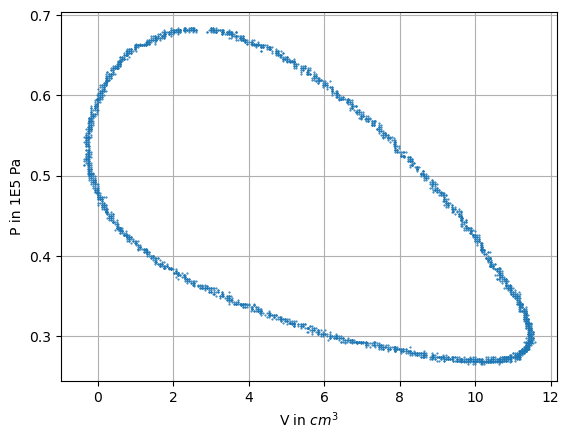

number of loops = 1. Total area = 2.6999633097578064. Area of loop = 2.6999633097578064.


In [9]:
dfv = pd.read_csv("rL7C2.csv")
dfp = pd.read_csv("rL7C1.csv")

tV = dfv['[s]'].to_numpy()
Vv = dfv['CH2[V]'].to_numpy()
tP = dfp['[s]'].to_numpy()
Pv = dfp['CH1[V]'].to_numpy()
tV_rng = np.array([-0.12, -0.025, 0.119])
tP_rng = np.array([-0.1, 0.03, 0.12])

Vc = Vv*2.4
DtV = tV[-1] - tV[0]
minx, miny = minfinder(tV, Vc, tV_rng)
TV = np.mean(np.diff(minx))
TnV = DtV/TV
plt.plot(tV, Vc, 'o', ms=1)
for i in minx:
    plt.axvline(i, color='green', linestyle='--')
    plt.text(i, 0, f'{i:.2f}', rotation=90, 
             verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('time')
plt.ylabel('V in $cm^3$')
plt.grid()
plt.savefig('L71.png', dpi=100)
plt.show()
print(f'Del_t = {DtV}, T = {TV}, no. of periods = {TnV}.')

Ppa = P_fn(Pv)
DtP = tP[-1] - tP[0]
minx, miny = minfinder(tP, Ppa, tP_rng)
TP = np.mean(np.diff(minx))
TnP = DtP/TP
plt.plot(tP, Ppa, 'o', ms=1)
for i in minx:
    plt.axvline(i, color='green', linestyle='--')
    plt.text(i, Ppa.min(), f'{i:.2f}', rotation=90, 
             verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('time')
plt.ylabel('P in 1E5 Pa')
plt.grid()
plt.savefig('L72.png', dpi=100)
plt.show()
print(f'Del_t = {DtP}, T = {TP}, no. of periods = {TnP}.')

Tn = 1      # INPUT
t_ind = np.where(tV <= tV[0] + Tn*TV)[0]
Vc1, Ppa1 = Vc[t_ind], Ppa[t_ind]
plt.plot(Vc1, Ppa1, '.', ms = 1)
plt.xlabel('V in $cm^3$')
plt.ylabel('P in 1E5 Pa')
plt.grid()
plt.savefig('L7.png', dpi=150)
plt.show()

At = abs(np.trapz(Ppa1, Vc1))
Al = At/Tn
print(f'number of loops = {Tn}. Total area = {At}. Area of loop = {Al}.')